# PVE-analysis on research funding
*Collective Compass Project, DJA, July 2022*

## Loading the necessary Python modules.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
plt.rcParams.update({'font.size': 14}) # must set in top
plt.rcParams.update({'figure.figsize': (14, 4)}) # must set in top

---
## Reading the data from disk

In [2]:
# 550 M is the total budget
df1 = pd.read_csv('Property values 1.csv', sep=';')

In [3]:
# 400 M is the total budget
df2 = pd.read_csv('Property values 2.csv', sep=';')

In [4]:
# 900 M is the total budget
df3 = pd.read_csv('Property values 3.csv', sep=';')

In [5]:
df = pd.read_stata('DJA_forDJA.dta')

---
## Correct the data where needed

In [6]:
df['inst'] = df['inst'].replace('Delft University of Technology', 'Technische Universiteit Delft')

---
# Plot basic participation stats per stratification of choice

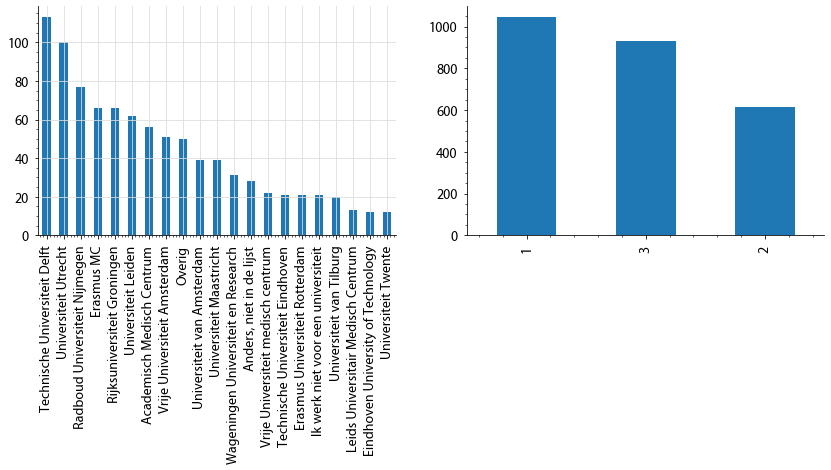

In [7]:
plt.figure()
plt.subplot(121)
df['inst'].value_counts().plot.bar()
plt.grid()
plt.subplot(122)
df['versie'].value_counts().plot.bar();

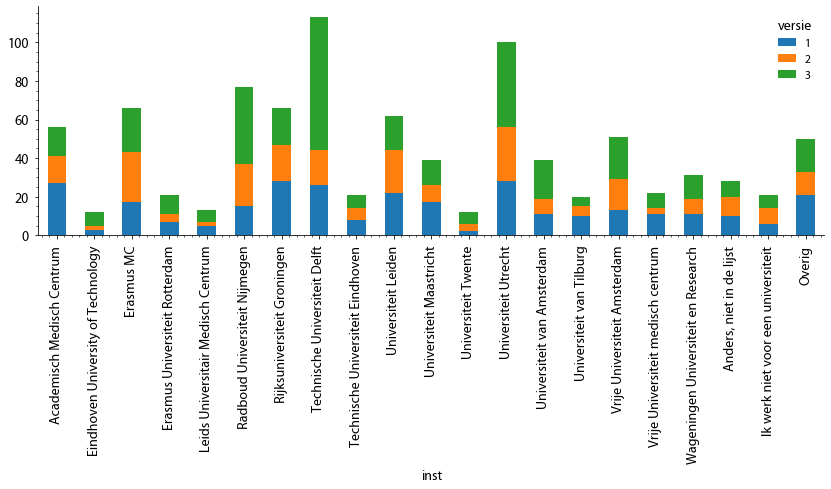

In [8]:
df_vals = df[['inst', 'versie']].value_counts()
df_vals.unstack('versie').plot.bar(stacked=True);

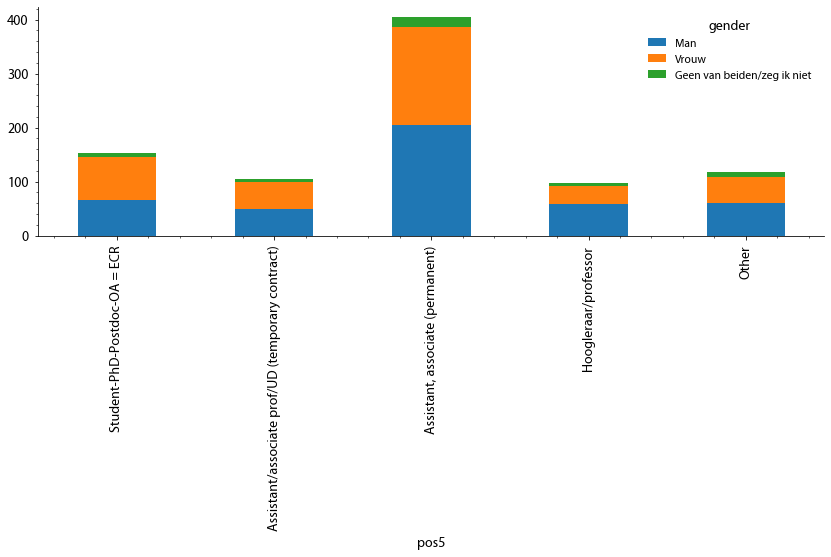

In [9]:
df_vals = df[['pos5', 'gender']].value_counts()
df_vals.unstack('gender').plot.bar(stacked=True);

---
## Postprocess the kt values to fraction of the total budget.

In [10]:
# First, we read the actual maximum budget values of which the kt values are a fraction from the table.
df1_abs_vals = df1.iloc[0:11, 2].values
df2_abs_vals = df2.iloc[0:11, 2].values
df3_abs_vals = df3.iloc[0:11, 2].values

In [81]:
# Second, we multiply the kt values with the values above and normalize with the total
# to make each kt a fraction of the total money spend.
df_kt = df[['versie', 'ktversie', 'kt1', 'kt2', 'kt3', 'kt4', 'kt5', 'kt6', 'kt7', 'kt8', 'kt9', 'kt10', 'kt11']].copy()
df_kt['success_chance'] = df_kt['ktversie'].copy()
df_kt['invested_time'] = df_kt['ktversie'].copy()

mask = df_kt['versie'] == '1'
df_kt.loc[mask, 'success_chance'] = (df_kt['success_chance']-1).floordiv(3.)
df_kt.loc[mask, 'invested_time'] = (df_kt['invested_time']-1).mod(3.)
for ikt in range(11):
    key = 'kt{}'.format(ikt+1)
    df_kt.loc[mask, key] = df_kt.loc[mask, key] * df1_abs_vals[ikt] / 550.
 
mask = df_kt['versie'] == '2'
df_kt.loc[mask, 'success_chance'] = (df_kt['success_chance']-1).floordiv(3.)
df_kt.loc[mask, 'invested_time'] = (df_kt['invested_time']-1).mod(3.)
for ikt in range(11):
    key = 'kt{}'.format(ikt+1)
    df_kt.loc[mask, key] = df_kt.loc[mask, key] * df2_abs_vals[ikt] / 400.

mask = df_kt['versie'] == '3'
df_kt.loc[mask, 'success_chance'] = (df_kt['success_chance']-1).floordiv(3.)
df_kt.loc[mask, 'invested_time'] = (df_kt['invested_time']-1).mod(3.)
for ikt in range(11):
    key = 'kt{}'.format(ikt+1)
    df_kt.loc[mask, key] = df_kt.loc[mask, key] * df3_abs_vals[ikt] / 900.

df_kt

,versie,ktversie,kt1,kt2,kt3,kt4,kt5,kt6,kt7,kt8,kt9,kt10,kt11,success_chance,invested_time
0,3,3.0,0.112222,0.110000,0.111111,0.000000,0.000000,0.091111,0.111111,0.000000,0.111111,0.243333,0.111111,0.0,2.0
1,2,1.0,0.075000,0.125000,0.075000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.247500,0.250000,0.0,0.0
2,3,3.0,0.055556,0.044444,0.044444,0.111111,0.111111,0.055556,0.000000,0.011111,0.083333,0.238889,0.244444,0.0,2.0
3,1,1.0,0.036364,0.090909,0.027273,0.272727,0.072727,0.011364,0.027273,0.000000,0.175000,0.181818,0.066116,0.0,0.0
4,1,2.0,0.014545,0.029091,0.016364,0.080000,0.074545,0.008636,0.018182,0.000000,0.005000,0.563636,0.061488,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2588,1,9.0,0.090909,0.136364,0.054545,0.109091,0.072727,0.018182,0.072727,0.036364,0.250000,0.163636,0.046281,2.0,2.0
2589,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2590,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# Create a table with the fraction spent per kt item per group.
df_kt_per_version = df_kt.groupby('versie')[['kt1', 'kt2', 'kt3', 'kt4', 'kt5', 'kt6', 'kt7', 'kt8', 'kt9', 'kt10', 'kt11']]
df_kt_per_version.mean()

,kt1,kt2,kt3,kt4,kt5,kt6,kt7,kt8,kt9,kt10,kt11
versie,,,,,,,,,,,
1,0.048616,0.056765,0.047164,0.084778,0.058571,0.013198,0.035829,0.027095,0.224284,0.244114,0.055793
2,0.058188,0.061333,0.062683,0.078136,0.048423,0.059042,0.034974,0.010049,0.104033,0.267875,0.171699
3,0.051949,0.060866,0.057708,0.092515,0.054497,0.061682,0.038118,0.005908,0.097983,0.275585,0.148309


In [80]:
# Print the fraction of the total money spent per experiment version.
df_kt_per_version.mean().sum(axis=1)

versie
1    0.896206
2    0.956434
3    0.945120
dtype: float64

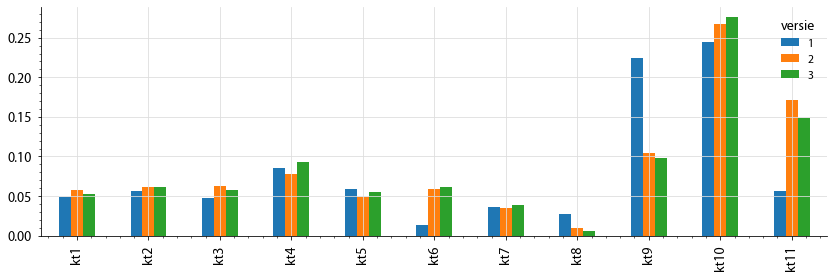

In [14]:
# Plot a histogram with a bar per version.
df_kt_per_version.mean().transpose().plot.bar()
plt.grid()

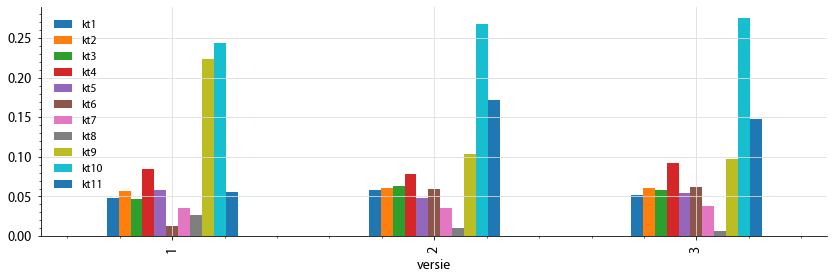

In [15]:
# Plot a histogram per version.
df_kt_per_version.mean().plot.bar()
plt.grid()

In [26]:
df1['1708-gemiddelde-succeskans-per-voorstel'].values.reshape(9, 11)
df1['1776-aantal-weken-besteed-per-ingediend-voorstel'].values.reshape(9, 11)

array([[ 3,  2,  3,  4,  4,  1,  1,  3,  0,  0,  3],
       [ 4,  2,  4,  4,  5,  1,  1,  4,  1,  1,  4],
       [ 6,  2,  6,  8, 10,  1,  1,  5,  1,  1,  6],
       [ 3,  2,  3,  4,  4,  1,  1,  3,  0,  0,  3],
       [ 4,  2,  4,  4,  5,  1,  1,  4,  1,  1,  4],
       [ 6,  2,  6,  8, 10,  1,  1,  5,  1,  1,  6],
       [ 3,  2,  3,  4,  4,  1,  1,  3,  0,  0,  3],
       [ 4,  2,  4,  4,  5,  1,  1,  4,  1,  1,  4],
       [ 6,  2,  6,  8, 10,  1,  1,  5,  1,  1,  6]])

In [23]:
df2['1836-gemiddelde-succeskans-per-voorstel'].values.reshape(9, 11)

array([[ 10,  25,  10,  15,  25,  40,  30,   1,   2, 100, 100],
       [ 10,  25,  10,  15,  25,  40,  30,   1,   2, 100, 100],
       [ 10,  25,  10,  15,  25,  40,  30,   1,   2, 100, 100],
       [ 15,  30,  15,  20,  30,  50,  35,   1,   5, 100, 100],
       [ 15,  30,  15,  20,  30,  50,  35,   1,   5, 100, 100],
       [ 15,  30,  15,  20,  30,  50,  35,   1,   5, 100, 100],
       [ 25,  35,  25,  25,  35,  60,  40,   1,   8, 100, 100],
       [ 25,  35,  25,  25,  35,  60,  40,   1,   8, 100, 100],
       [ 25,  35,  25,  25,  35,  60,  40,   1,   8, 100, 100]])

In [24]:
df3['1844-gemiddelde-succeskans-per-voorstel'].values.reshape(9, 11)

array([[ 10,  25,  10,  15,  25,  40,  30,   1,   2, 100, 100],
       [ 10,  25,  10,  15,  25,  40,  30,   1,   2, 100, 100],
       [ 10,  25,  10,  15,  25,  40,  30,   1,   2, 100, 100],
       [ 15,  30,  15,  20,  30,  50,  35,   1,   5, 100, 100],
       [ 15,  30,  15,  20,  30,  50,  35,   1,   5, 100, 100],
       [ 15,  30,  15,  20,  30,  50,  35,   1,   5, 100, 100],
       [ 25,  35,  25,  25,  35,  60,  40,   1,   8, 100, 100],
       [ 25,  35,  25,  25,  35,  60,  40,   1,   8, 100, 100],
       [ 25,  35,  25,  25,  35,  60,  40,   1,   8, 100, 100]])

AttributeError: module 'pandas' has no attribute 'floordiv'

In [59]:
df_test = pd.DataFrame({'a' : [1., 2., 3., 4., 5., 6., 7., 8., 9.]})
(df_test['a']-1).mod(3.)
(df_test['a']-1).floordiv(3.)

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
5    1.0
6    2.0
7    2.0
8    2.0
Name: a, dtype: float64